<a href="https://colab.research.google.com/github/princeKike27/Endangered-Species-in-US-National-Parks/blob/main/biodiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Endangered Species in US National Parks

For this project I will analyze data from the National Parks Service about endangered species in different parks. In that sense, I will identify if there are any patterns in the types of species that become endangered. 

In [1]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Observations DataSet

In [2]:
# load observation dataset
df_observations = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Endangered-Species-in-US-National-Parks/main/observations.csv')
df_observations.head()


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
# df shape
df_observations.shape

(23296, 3)

In [4]:
# check column types
df_observations.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [5]:
# descriptive statistics of observations column
df_observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


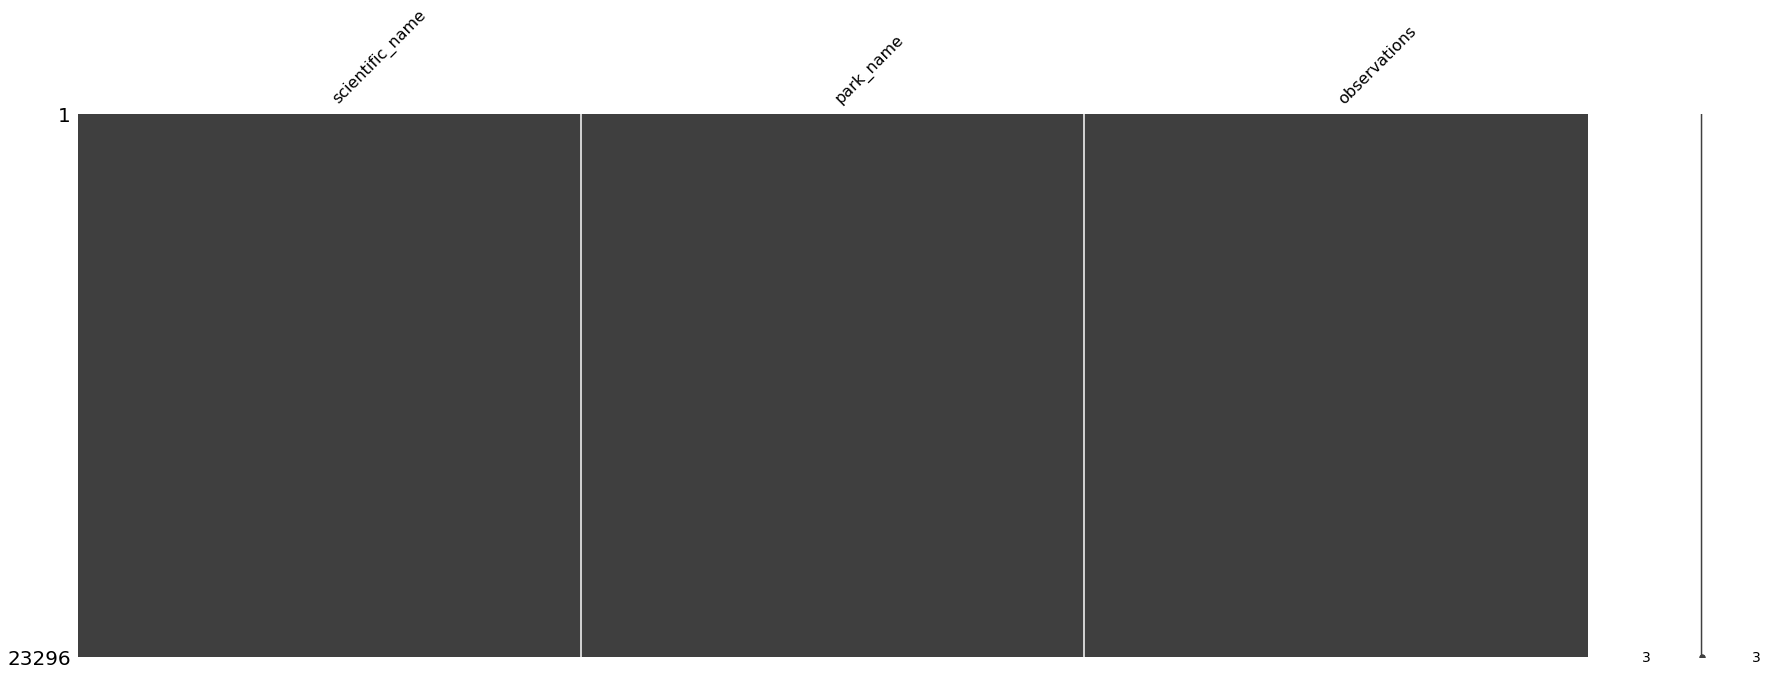

In [6]:
# check for missing values
import missingno as msg

msg.matrix(df_observations, figsize=(30,10))

In [7]:
# check unique values of park_name
parks = list(df_observations['park_name'].unique())
parks

['Great Smoky Mountains National Park',
 'Yosemite National Park',
 'Bryce National Park',
 'Yellowstone National Park']

In [8]:
# check unique values of scientific_name
print(df_observations['scientific_name'].unique())
print(f"Unique Species: {len(df_observations['scientific_name'].unique())}")

['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']
Unique Species: 5541


Mean of Species Observation in Great Smoky Mountains National Park: 74.14
Median of Species Observation in Great Smoky Mountains National Park: 74.0 

Mean of Species Observation in Yosemite National Park: 148.24
Median of Species Observation in Yosemite National Park: 149.0 

Mean of Species Observation in Bryce National Park: 98.91
Median of Species Observation in Bryce National Park: 99.0 

Mean of Species Observation in Yellowstone National Park: 247.86
Median of Species Observation in Yellowstone National Park: 249.0 



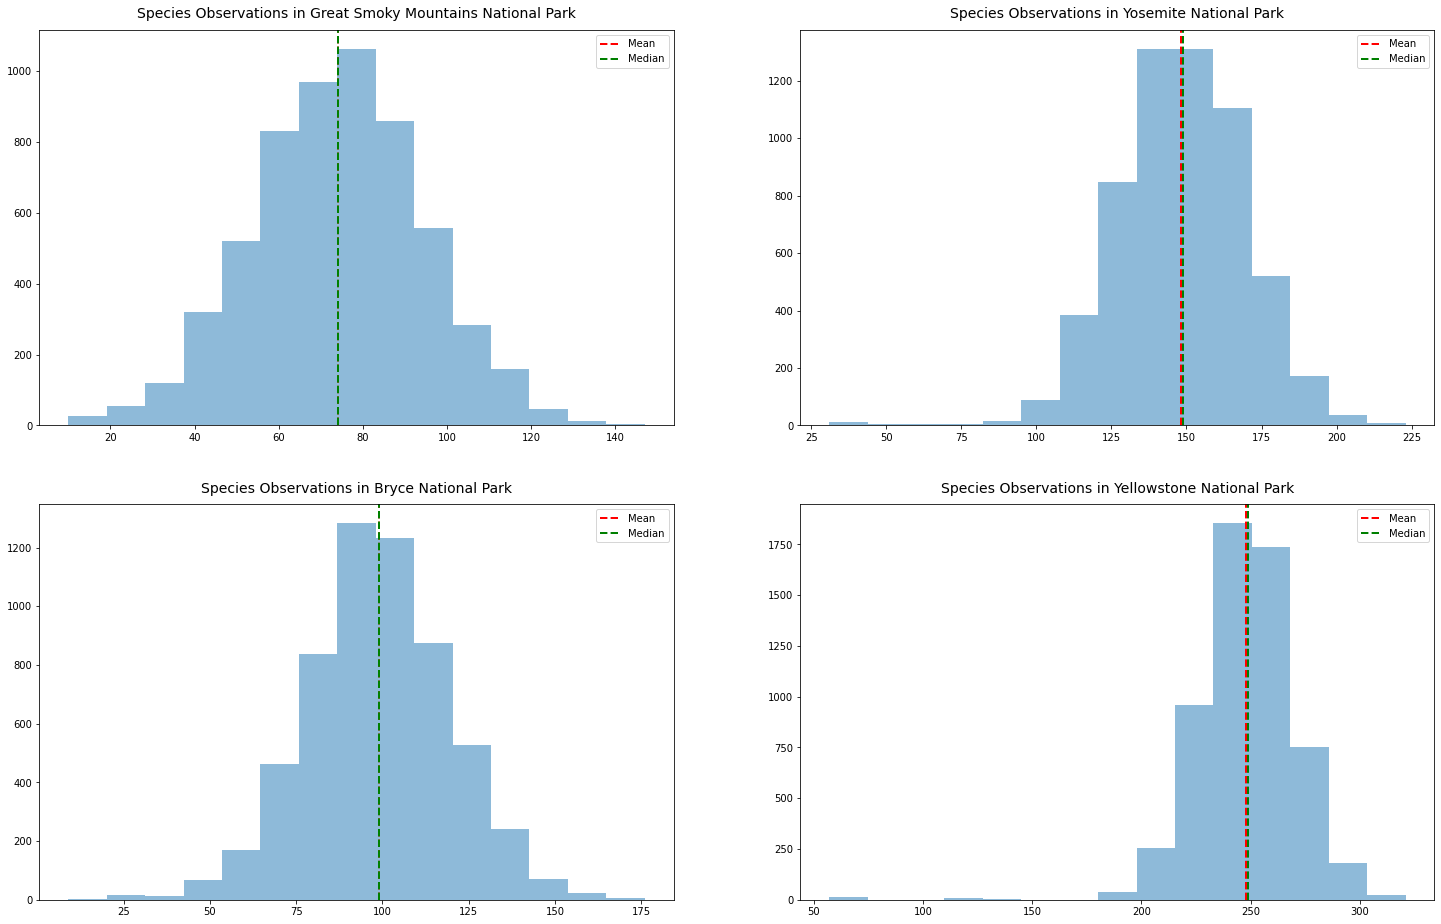

In [9]:
# Histogram of Observations per National Park

# variable to store plot counter
n = 1

fig = plt.figure(figsize=(25, 16))

# plot histograms
for el in parks:
  ax = plt.subplot(2, 2, n)
  # store information of park
  df_park = df_observations[df_observations['park_name'] == el]

  plt.hist(df_park['observations'], bins=15, alpha=0.5)
  plt.axvline(df_park['observations'].mean(), linestyle='dashed', linewidth=2, color='red', label='Mean')
  plt.axvline(df_park['observations'].median(), linestyle='dashed', linewidth=2, color='green', label='Median')

  plt.legend()
  plt.title(f'Species Observations in {el}', fontsize=14, pad=12)
  n += 1
  print(f"Mean of Species Observation in {el}: {np.round(df_park['observations'].mean(), 2)}")
  print(f"Median of Species Observation in {el}: {df_park['observations'].median()}", '\n')

plt.show()

  


# Species_Info Dataset

In [10]:
# load specie_info dataset
df_species_info = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Endangered-Species-in-US-National-Parks/main/species_info.csv')
df_species_info.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [11]:
# shape of data
df_species_info.shape

(5824, 4)

In [12]:
# check column types
df_species_info.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

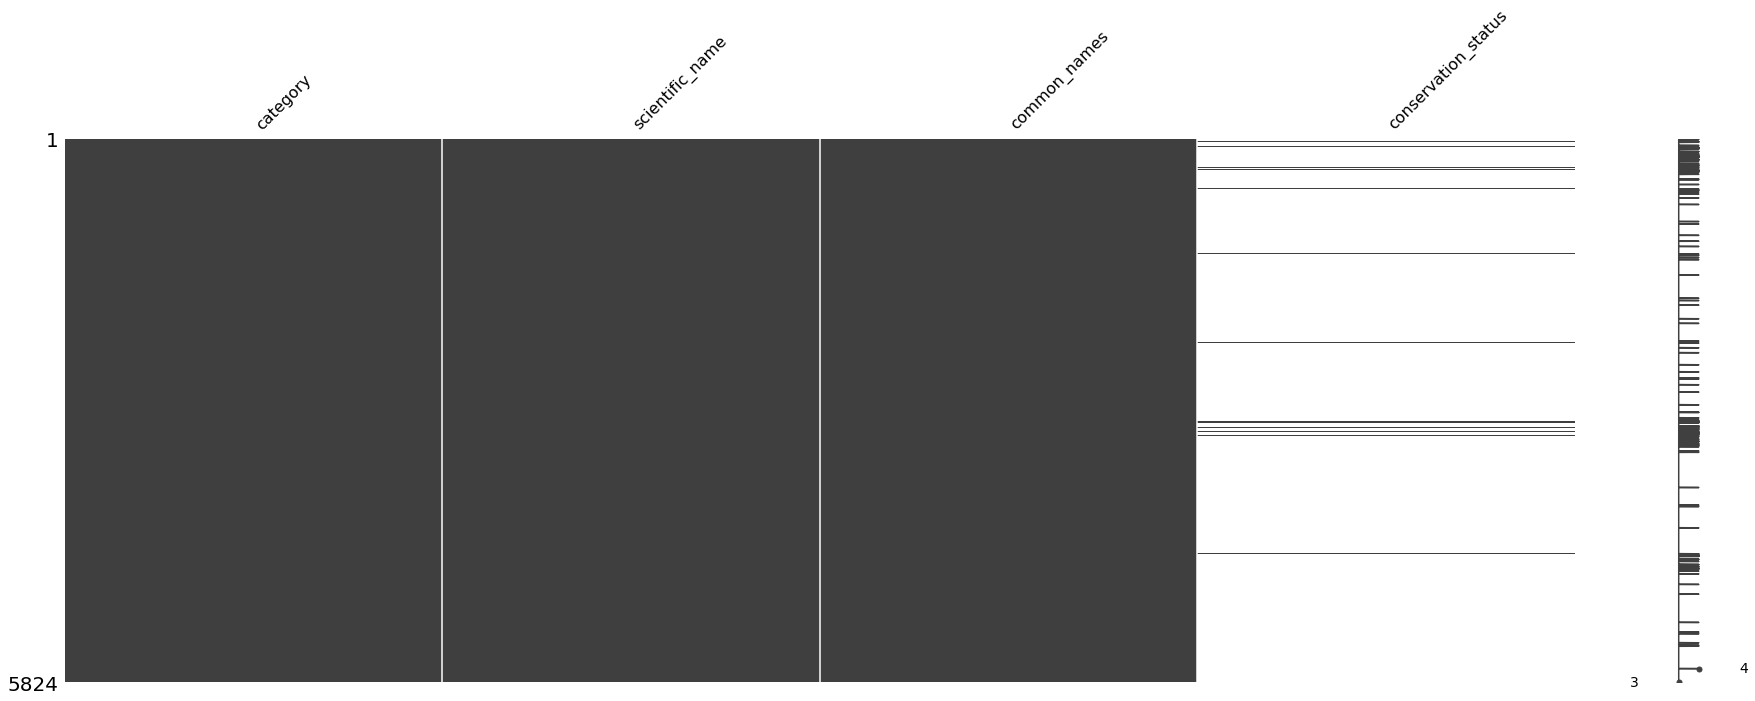

In [13]:
# check missing values

msg.matrix(df_species_info, figsize=(30,10))


In [14]:
# check unique values of conservation_status
df_species_info.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [15]:
# change nan values for 'No Data'
df_species_info['conservation_status'].fillna('No Intervention', inplace=True)

In [16]:
# check unique values of conservation_status
df_species_info.conservation_status.unique()

array(['No Intervention', 'Species of Concern', 'Endangered',
       'Threatened', 'In Recovery'], dtype=object)

In [17]:
# group by conservation status
df_species_info.groupby(['conservation_status']).size()


conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

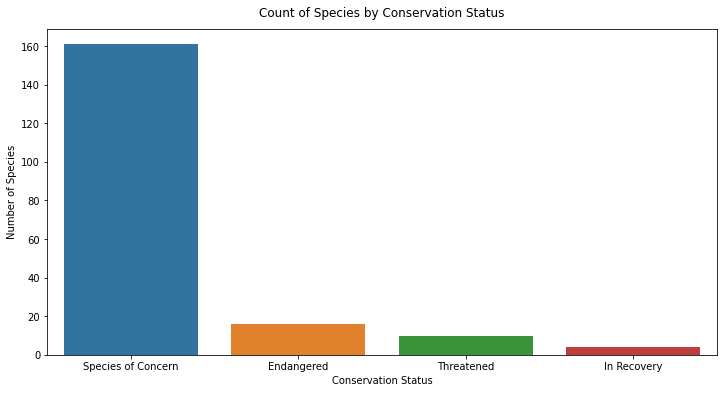

In [18]:
# count plot of conservation status
df_conservation_status = df_species_info[df_species_info['conservation_status'] != 'No Intervention']

f, ax = plt.subplots(figsize=(12, 6))

sns.countplot(x='conservation_status', data=df_conservation_status)

plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.title('Count of Species by Conservation Status', pad=12)
plt.show()

In [19]:
# group by category
df_species_info.groupby(['category']).size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [20]:
# conservations by category
conservation_category = df_conservation_status.groupby(['conservation_status', 'category'])\
                        ['scientific_name'].count().unstack()

conservation_category


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


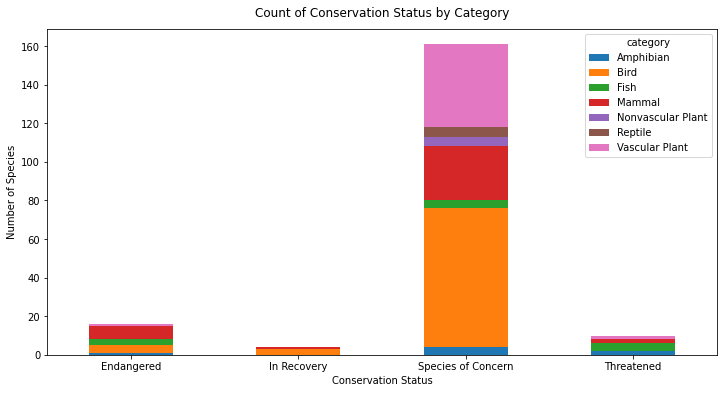

In [21]:
# plot conservation by category

ax = conservation_category.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xticks(rotation=0)
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.title('Count of Conservation Status by Category', pad=12)
plt.show()

# Are Certain Type of Species Most Likely to be Endangered?

In [22]:
# create column is_protected in df
df_species_info['is_protected'] = df_species_info.conservation_status != 'No Intervention'
df_species_info.head(10)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True


In [23]:
# check to see number of protected species by category
category_counts = df_species_info.groupby(['category', 'is_protected'])\
                  .scientific_name.nunique()\
                  .reset_index()

category_counts.head()

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


In [24]:
# pivot table
category_counts = category_counts.pivot(
    columns='is_protected',
    index='category',
    values='scientific_name').reset_index()

# change column names
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts


,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [25]:
# calculate rate of protection for each category
category_counts['%_protected'] = np.round(category_counts.protected / \
                                (category_counts.not_protected + category_counts.protected) * 100, 3)

category_counts

,category,not_protected,protected,%_protected
0,Amphibian,72,7,8.861
1,Bird,413,75,15.369
2,Fish,115,11,8.730
3,Mammal,146,30,17.045
4,Nonvascular Plant,328,5,1.502
5,Reptile,73,5,6.410
6,Vascular Plant,4216,46,1.079


# Statistical Significance

- Chi-Square tests will be run to see if different species have statistically differences in conservation status rates.

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

In [26]:
# import chi-square package
from scipy.stats import chi2_contingency


In [27]:
# Mammals & Birds

contingency_1 = [[30, 146],
                 [75, 413]]

print('Ho >> No association between mammals and birds conservation rates')
print('H1 >> There is an association between mammals and birds conservation rates', '\n')

chi2, pval, dof, expected = chi2_contingency(contingency_1)

print('Expected value if there was No Association:')
print(expected, '\n')

print(f'P-Value:{pval}')
print('Significant Threshold: 0.05', '\n')

print('We can conclude with a 95% confidence that there is NO Association between mammals and birds conservation rates.')
print('There is no statiscally significant difference between mammals and birds conservation rates.')

Ho >> No association between mammals and birds conservation rates
H1 >> There is an association between mammals and birds conservation rates 

Expected value if there was No Association:
[[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]] 

P-Value:0.6875948096661336
Significant Threshold: 0.05 

We can conclude with a 95% confidence that there is NO Association between mammals and birds conservation rates.
There is no statiscally significant difference between mammals and birds conservation rates.


In [28]:
# Mammals & Reptiles

contingency_2 = [[30, 146],
                 [5, 73]]

print('Ho >> There is no association between mammals and reptiles conservation rates')
print('H1 >> There is an association between mammals and reptiles conservation rates', '\n')

chi2, pval, dof, expected = chi2_contingency(contingency_2)

print('Expected values if there was No Association')
print(expected, '\n')

print(f'P-Value: {pval}')
print('Significant Threshold: 0.05', '\n')

print('We can conclude with a 95% confidence that there IS an association between mammals and reptiles conservation rates.')
print('Mammals are shown to have a statiscally significant higher rate of needed protection than reptiles.')

Ho >> There is no association between mammals and reptiles conservation rates
H1 >> There is an association between mammals and reptiles conservation rates 

Expected values if there was No Association
[[ 24.2519685 151.7480315]
 [ 10.7480315  67.2519685]] 

P-Value: 0.03835559022969898
Significant Threshold: 0.05 

We can conclude with a 95% confidence that there IS an association between mammals and reptiles conservation rates.
Mammals are shown to have a statiscally significant higher rate of needed protection than reptiles.


# Status of Conservation of a Given Specie per National Park

In [36]:
# look at the common names from df_species_info to see what are the most recurrent animals in the dataset

# import modules
from itertools import chain
import string

# function to remove punctuations 
def remove_punctuations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

# apply remove_punctuations to common_names column
recurrent_names = df_species_info[df_species_info.category == 'Mammal']\
                  .common_names.apply(remove_punctuations)\
                  .str.split().tolist()


recurrent_names[:6]


[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [37]:
# clean duplicate words in each row >> they should not be counted more than once per species
clean_names = []

for el in recurrent_names:
  el = list(dict.fromkeys(el))
  clean_names.append(el)

clean_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [38]:
# put all words into a single list
names_list = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_names))

names_list[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [40]:
# count number of occurences of each word
words_counted = []

for el in names_list:
  # count number of times the el appears on names_list
  x = names_list.count(el)
  words_counted.append((el, x))

words_counted[:6]

[('Gappers', 1),
 ('RedBacked', 2),
 ('Vole', 11),
 ('American', 12),
 ('Bison', 2),
 ('Aurochs', 1)]

In [48]:
# turn words_counted to DF
pd.DataFrame(set(words_counted), columns=['Word', 'Count']).sort_values('Count', ascending=False).head(10)

,Word,Count
46,Bat,23
171,Shrew,18
177,Myotis,17
83,Mouse,16
200,Chipmunk,13
15,Squirrel,12
7,American,12
88,Eastern,11
190,Vole,11
122,Mountain,10


In [51]:
# Bat is the animal that is more recurrent in the dataset
# since there are different types of bats >> create new column to check if the animal is a bat

df_species_info['is_bat'] = df_species_info.common_names.str.contains(r"\bBat\b", regex=True)
df_species_info.head()


,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [78]:
# df of bats
df_bats = df_species_info[df_species_info['is_bat']]
df_bats

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [77]:
# merge with observations df >> create a df with observations of bats accross the 4 National Parks

bat_observations = df_observations.merge(df_bats)
bat_observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True


In [59]:
# bat observations per park
bat_observations.groupby(['park_name']).observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [65]:
# number of bats protected per National Parks
bat_protection_parks = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
bat_protection_parks

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


In [69]:
# pivot table
bat_pivot = bat_protection_parks.pivot(
    columns='is_protected',
    index='park_name',
    values='observations'
).reset_index()

bat_pivot.columns = ['park_name', 'not_protected', 'protected']
bat_pivot

,park_name,not_protected,protected
0,Bryce National Park,1596,1837
1,Great Smoky Mountains National Park,1299,1112
2,Yellowstone National Park,4044,4318
3,Yosemite National Park,2345,2441


In [71]:
# add '%_protected' column
bat_pivot['%_protected'] = np.round(bat_pivot.protected / \
                                    (bat_pivot.not_protected + bat_pivot.protected), 3) * 100

bat_pivot

,park_name,not_protected,protected,%_protected
0,Bryce National Park,1596,1837,53.5
1,Great Smoky Mountains National Park,1299,1112,46.1
2,Yellowstone National Park,4044,4318,51.6
3,Yosemite National Park,2345,2441,51.0


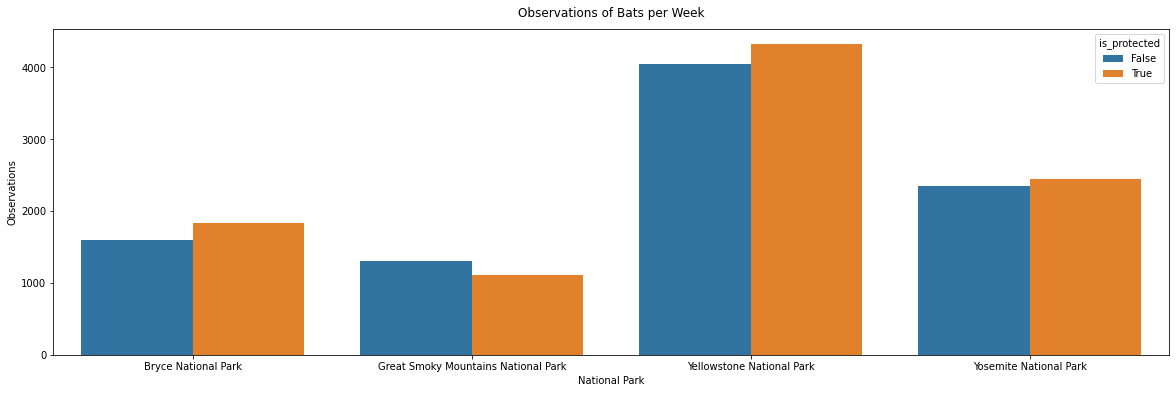

In [76]:
# barplot of bat population in US National Parks

f, ax = plt.subplots(figsize=(20, 6))

sns.barplot(x='park_name', y='observations', data=bat_protection_parks, hue='is_protected')

plt.xlabel('National Park')
plt.ylabel('Observations')
plt.title('Observations of Bats per Week', pad=12)
plt.show()